In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat
from scipy import signal

#custom made functions
import utils
import functions as fn

In [2]:
# Get the w0's and w1's for the units

cm = 1.0; N = 129; A = N*N; sf0 = 4/N; phase = 0.0; std = 1/(8*sf0)


step = np.pi/18; orientations = np.arange(0,np.pi, step)
w0Dict={};w1Dict ={}
for ind, ori in enumerate(orientations):

    w0 = fn.getGabor(cm,sf0,ori,N,phase,std) 
    A = np.sum(np.absolute(w0)); w0Dict[ori] = w0/A
    
    w1 = fn.getGabor(cm,sf0,ori,N,phase+np.pi/2,3*std)
    Aw = np.sum(np.absolute(w1)); w1Dict[ori] = w1/Aw

### ### Run the model for Fig 7a

In [3]:
alpha1 = 0.2; alpha2 = 1;  alphas = (alpha1,alpha2)
lamdas1 = np.array([0,1,2,10]); lamda2 = 1

pa2m = 0.5; lr = 0.1; XORNorm = 0.2; minIterations = 20

#orientation,phases and spatial frequency of stimuli
orientationsStim = np.arange(-np.pi/2,np.pi/2+step,step);phasesStim = np.arange(-np.pi/2,np.pi/2+step,step)
sf = sf0


for indL,lamda1 in enumerate(lamdas1):
    print(f'we are doing lamda1 = {lamda1}')
    lamdas = (lamda1,lamda2)
    J = {}
    for indPhase, ph in enumerate(phasesStim):
        J[indPhase] = {}
        for indOri, ori in enumerate(orientationsStim):
    
            stim = fn.getGabor(cm,sf,ori,N,ph,std)
            J[indPhase][indOri],_,_ = fn.fullModel(stim, w0Dict, w1Dict,orientations,lamdas,lr,alphas,pa2m)
                
    fileSave = 'data/_5OrientationTuningLamda1'+str(lamda1)+'lamda2'+str(lamda2)+'Pa2m'+str(pa2m)+'alpha2'+str(alpha2)+'.pckl'
    utils.saveVar((orientations,orientationsStim,phasesStim,J),fileSave)


we are doing lamda1 = 0
we are doing lamda1 = 1
we are doing lamda1 = 2
we are doing lamda1 = 10


### ### Run the model for Fig 7b

In [4]:
alpha1 = 0.2; alpha2 = 1;  alphas = (alpha1,alpha2)
lamda1 = 10; lamdas2 = np.array([0,2,4,10,20])

pa2m = 0.5; lr = 0.1; XORNorm = 0.2; minIterations = 20

#orientation,phases and spatial frequency of stimuli
orientationsStim = np.arange(-np.pi/2,np.pi/2+step,step);phasesStim = np.arange(-np.pi/2,np.pi/2+step,step)
sf = sf0


for indL,lamda2 in enumerate(lamdas2):
    print(f'we are doing lamda2 = {lamda2}')
    lamdas = (lamda1,lamda2)
    J = {}
    for indPhase, ph in enumerate(phasesStim):
        J[indPhase] = {}
        for indOri, ori in enumerate(orientationsStim):
    
            stim = fn.getGabor(cm,sf,ori,N,ph,std)
            J[indPhase][indOri],_,_ = fn.fullModel(stim, w0Dict, w1Dict,orientations,lamdas,lr,alphas,pa2m)
                
    fileSave = 'data/_5OrientationTuningLamda1'+str(lamda1)+'lamda2'+str(lamda2)+'Pa2m'+str(pa2m)+'alpha2'+str(alpha2)+'.pckl'
    utils.saveVar((orientations,orientationsStim,phasesStim,J),fileSave)

we are doing lamda2 = 0
we are doing lamda2 = 2
we are doing lamda2 = 4
we are doing lamda2 = 10
we are doing lamda2 = 20


### ### Run the model for Fig 7c

In [5]:
alpha1 = 0.2; alphas2 = np.array([0,0.4,1,2]); 
lamda1 = 10; lamda2 = 10; lamdas = (lamda1,lamda2)

pa2m = 0.5; lr = 0.1; XORNorm = 0.2; minIterations = 20

#orientation,phases and spatial frequency of stimuli
orientationsStim = np.arange(-np.pi/2,np.pi/2+step,step);phasesStim = np.arange(-np.pi/2,np.pi/2+step,step)
sf = sf0


for alpha2 in alphas2:
    print(f'we are doing alpha2 = {alpha2}')
    alphas = (alpha1,alpha2)
    J = {}
    for indPhase, ph in enumerate(phasesStim):
        J[indPhase] = {}
        for indOri, ori in enumerate(orientationsStim):
    
            stim = fn.getGabor(cm,sf,ori,N,ph,std)
            J[indPhase][indOri],_,_ = fn.fullModel(stim, w0Dict, w1Dict,orientations,lamdas,lr,alphas,pa2m)
                
    fileSave = 'data/_5OrientationTuningLamda1'+str(lamda1)+'lamda2'+str(lamda2)+'Pa2m'+str(pa2m)+'alpha2'+str(alpha2)+'.pckl'
    utils.saveVar((orientations,orientationsStim,phasesStim,J),fileSave)

we are doing alpha2 = 0.0
we are doing alpha2 = 0.4
we are doing alpha2 = 1.0
we are doing alpha2 = 2.0


### Load the data and do analysis to produce Fig 7a 

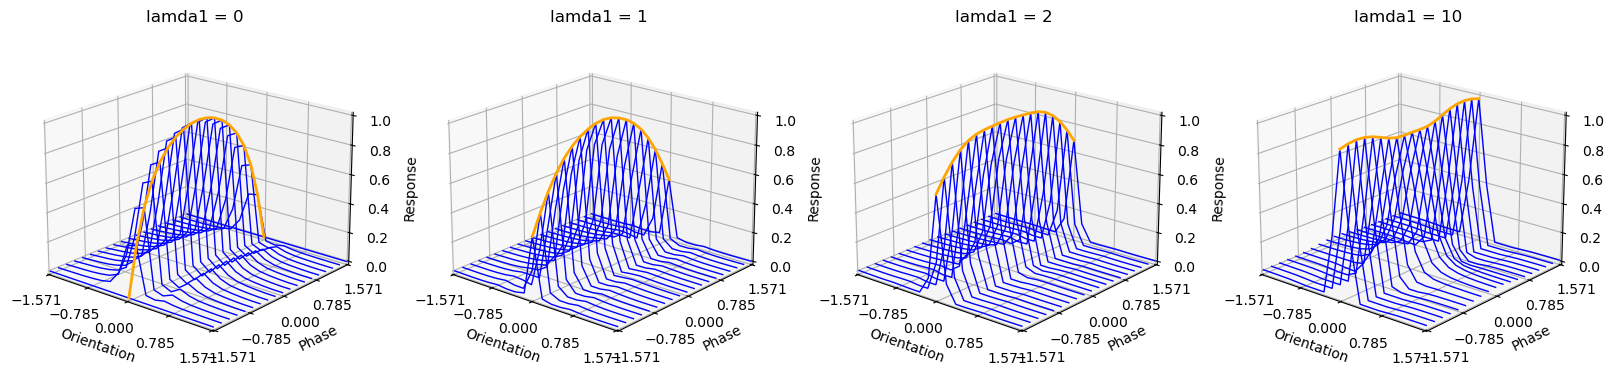

In [6]:
#3d PLOT OF THE ORIENTATION TUNING CURVES WITH FIXED LAMDA RECURRENT AND VARYING LAMDA PARALLEL TO SHOW 
#SIMPLE TO COMPLEX RESPONSE
alpha2 = 1; pa2m = 0.5

lamdas1 = np.array([0,1,2,10]);lamda2 = 1; indUnit = 0

fig = plt.figure(figsize=(20,12))
JAll = {}
for indLamda,lamda1 in enumerate(lamdas1):
    
    fileLoad = 'data/_5OrientationTuningLamda1'+str(lamda1)+'lamda2'+str(lamda2)+'Pa2m'+str(pa2m)+'alpha2'+str(alpha2)+'.pckl'
    (orientations,orientationsStim,phasesStim,J) = utils.loadVar(fileLoad)

    ones = np.ones(len(orientationsStim))
    x = orientationsStim
    
    JAll[lamda1,lamda2] = np.zeros((len(phasesStim),len(orientationsStim))) 
    for indPhase, ph in enumerate(phasesStim):
        for indOri, ori in enumerate(orientationsStim): 
            JAll[lamda1,lamda2][indPhase,indOri] =  fn.ReLU(J[indPhase][indOri][indUnit]) 
                
                
    indZero = np.argmin(np.abs(orientationsStim)) # we pick the zero orientation
    phaseValues = np.zeros(len(phasesStim))
    ax = fig.add_subplot(1, len(lamdas1), indLamda+1, projection='3d')
    ttl = 'lamda1 = '+str(lamda1)
    plt.title(ttl)    
    x2 = np.zeros(len(orientationsStim))
    normValue = np.max(JAll[lamda1,lamda2])

    for indPhase2, phase2 in enumerate(phasesStim):
    
        z = JAll[lamda1,lamda2][indPhase2,:]/normValue
        phaseValues[indPhase2] = np.max(JAll[lamda1,lamda2][indPhase2,:])/normValue
        x2[indPhase2] = orientationsStim[np.argmax(JAll[lamda1,lamda2][indPhase2,:])]
        y = ones*phase2
        ax.plot3D(x, y, z, 'blue',linewidth=1)
        plt.xticks(np.array([-np.pi/2,-np.pi/4, 0, np.pi/4, np.pi/2]))
        plt.yticks(np.array([-np.pi/2,-np.pi/4, 0, np.pi/4, np.pi/2]))                  
    
    if indLamda == 0:
        if (indPhase2 == 0)|(indPhase2 == 18):
            x2[0] = orientationsStim[9]
            x2[-1] = orientationsStim[9]
        
        
    ax.plot3D(x2,phasesStim,phaseValues,'orange',linewidth = 2)
    # Customize the view angle so it's easier to see that the scatter points lie on the plane y=0
    ax.view_init(elev=20., azim=-50)


    # Make legend, set axes limits and labels
    ax.set_xlim(-1.6, 1.6)
    ax.set_ylim(-1.6, 1.6)
    #ax.set_zlim(0, 15)
    ax.set_xlabel('Orientation')
    ax.set_ylabel('Phase')
    ax.set_zlabel('Response')                
 


    #plt.savefig('data/Recurrent3D.eps', format='eps', dpi=1200)        
plt.show()

### Load the data and do analysis to produce Fig 7b

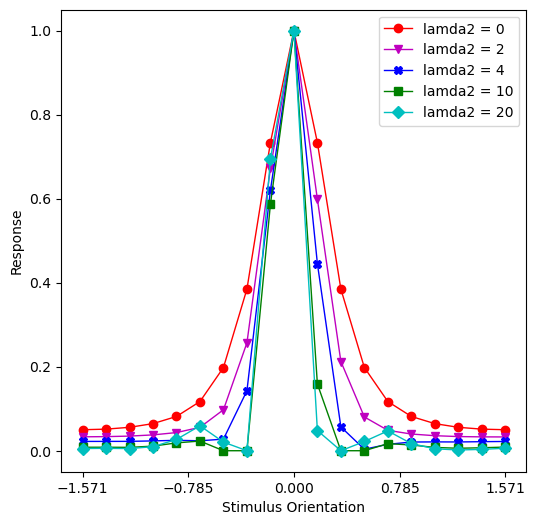

In [7]:
alpha2 = 1; pa2m = 0.5
lamda1 = 10 ;lamdas2 = np.array([0,2,4,10,20])
indUnit = 0

colors = ['r','m','b','g','c','y','k','orange']
markers = ["o","v","X","s","D","P","1","8"]

fig = plt.figure(figsize=(6,6))


JAll = {}
for indLamda,lamda2 in enumerate(lamdas2):
    
    fileLoad = 'data/_5OrientationTuningLamda1'+str(lamda1)+'lamda2'+str(lamda2)+'Pa2m'+str(pa2m)+'alpha2'+str(alpha2)+'.pckl'
    (orientations,orientationsStim,phasesStim,J) = utils.loadVar(fileLoad)
    indPhase = np.argmin(np.abs(phasesStim))
    
    JAll[lamda1,lamda2] = np.zeros(len(orientationsStim))
    for indOri, ori in enumerate(orientationsStim): 
            JAll[lamda1,lamda2][indOri] =  fn.ReLU(J[indPhase][indOri][indUnit])
    
    
    lbl = 'lamda2 = '+str(lamda2)        
    plt.plot(orientationsStim,JAll[lamda1,lamda2]/np.max(JAll[lamda1,lamda2]),colors[indLamda],marker = markers[indLamda],linewidth = 1,label=lbl)
    plt.ylabel('Response')
    plt.xlabel('Stimulus Orientation')
    plt.xticks(np.array([-np.pi/2,-np.pi/4, 0, np.pi/4, np.pi/2]))
    plt.yticks(np.arange(0,1.1,0.2))
    
plt.legend()

#plt.savefig('data/RecurrentPhaseResponse1.eps', format='eps', dpi=1200)        
plt.show()

### Load the data and do analysis to produce Fig 7c

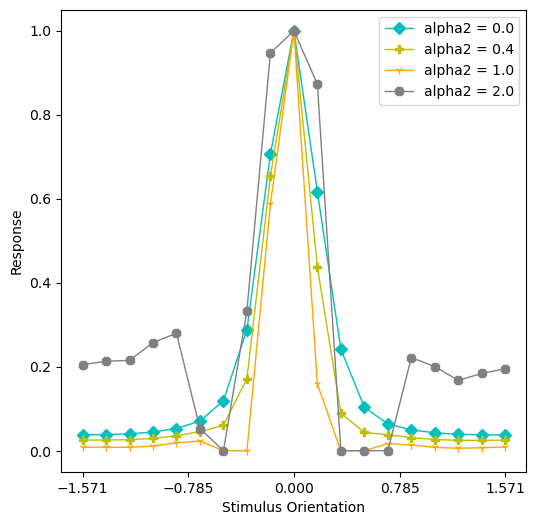

In [8]:
alphas2 = np.array([0,0.4,1,2])

lamda1 = 10; lamda2 = 10; pa2m = 0.5; indUnit = 0

colors = ['c','y','orange','gray','r','m','b','g']
markers = ["D","P","1","8","o","v","X","s"]

fig = plt.figure(figsize=(6,6))

JAll = {}
for indAlpha,alpha2 in enumerate(alphas2):
    
    fileLoad = 'data/_5OrientationTuningLamda1'+str(lamda1)+'lamda2'+str(lamda2)+'Pa2m'+str(pa2m)+'alpha2'+str(alpha2)+'.pckl'
        
    (orientations,orientationsStim,phasesStim,J) = utils.loadVar(fileLoad)

    indPhase = np.argmin(np.abs(phasesStim))
    
    
    JAll[alpha2] = np.zeros(len(orientationsStim))
    for indOri, ori in enumerate(orientationsStim): 
            JAll[alpha2][indOri] =  fn.ReLU(J[indPhase][indOri][indUnit])

    
    lbl = 'alpha2 = '+str(alpha2)        
    plt.plot(orientationsStim,JAll[alpha2]/np.max(JAll[alpha2]),colors[indAlpha],marker = markers[indAlpha],linewidth = 1,label=lbl)
    plt.ylabel('Response')
    plt.xlabel('Stimulus Orientation')
    plt.xticks(np.array([-np.pi/2,-np.pi/4, 0, np.pi/4, np.pi/2]))
    plt.yticks(np.arange(0,1.1,0.2))
    
plt.legend()

#plt.savefig('data/RecurrentPhaseResponse2.eps', format='eps', dpi=1200)        
plt.show()